###### Material desenvolvido para o minicurso: Introdução à solução numérica de EDP's, ministrado no ERMAC/2018 de 5 a 6 de abril de 2018 na Universidade Federal de Lavras, Lavras/MG, Brasil. Autor: [Jonas Laerte Ansoni](http://jonasansoni.blogspot.com.br/).

<img src="./figuras/logoemarc.png" width="30%">

# <center> Minicurso:<font color='blue'> Introdução à solução numérica de EDP's

Já vimos em aulas passadas o método de diferenças finitas para equações diferenciais parciais (EDP's) e o caso envolvendo o problema de convecção. Nesta secção vamos resolver um problema dominado por difução, conforme já apresentamos anteriormente.

Por que separamos a discussão de como resolver problemas dominados por convecção e dominados por difusão, você pode perguntar? É tudo sobre a harmonia entre o modelo matemático e o método numérico. Convecção e difusão são processos físicos inerentemente diferentes. 

Vamos a dois exemplos:

<i>* _Riding the wave_ - imagine um surfista em uma onda alta, movendo-se rapidamente para a praia ... a convecção implica transporte, velocidade, direção. A física tem um viés direcional, e descobrimos que os métodos numéricos devem ser compatíveis com isso. É por isso que usamos os métodos _upwind_ para a convecção, e prestamos atenção aos problemas onde as ondas se movem em direções opostas, necessitando de esquemas especiais.

<i>* _Spreading out_ - agora imagine uma gota de corante de comida em um copo de água, espalhando-se lentamente em todas as direções até que todo o líquido tome uma cor uniforme. [Diffusion](http://en.wikipedia.org/wiki/Diffusion) espalha a concentração de algo ao redor (átomos, pessoas, idéias, sujeira, qualquer coisa!). Uma vez que não é um processo direcional, precisamos de métodos numéricos isotrópicos (como diferenças centrais).</i>

## <center> 3. **Difusão**
<img src="./figuras/Blausen_0315_Diffusion.png" width="70%" align="center">
<img src="./figuras/video1.gif" width="40%">
#### <center> Figura 1. Processo de difusão.

### Observações:

No módulo anterior, discutindo as leis de conservação hiperbólica, aprendemos que as soluções possuem certas características: a informação viaja ao longo do caminho no espaço-tempo, ou seja, qualquer perturbação no tempo $t^n$ irá se propagar para os tempos futuros sem se alterar. Em contraste, as equações parabólicas,  o efeito da pertubação se dissipa, isto é, diminui, comforme aumenta a distância ao ponto de origiem. Isso é típico dos processos de difusão.

Nesta primeira lição do módulo, inicialmente analisamos a equação de difusão 1D e, em seguida, examinamos mais profundamente a questão das condições de fronteira. Em seguida, vamos introduzir a _discretização implícita_ o que permitirá a introdução de novos solucionadores lineares. Na próxima aula, abordaremos os casos em duas dimensões com enfoque nas condições de contorno e estabilidade. Em seguida, estudaremos os métodos implícitos 2D, e entraremos no método Crank-Nicolson: talvez o mais popular de todos. 

## Vamos voltar ao problema de dispersão de poluentes

### Modelo simplificado: Equação de transporte

\begin{equation}
\frac{\partial c}{\partial t} = -u \frac{\partial c}{\partial x}+ k \frac{\partial^2 c}{\partial x^2}
\end{equation}

<p class="lead"><center><font color='Red'> ** Termo advectivo (convectivo) + Temo difusivo **: __Equação de transporte__ </font></p>

No primeiro experimento desligamos a difusão (colocando $k=0$) e testamos apenas a parte de transporte. A condição inicial, calculada internamente no programa, é um pulso quadrado, cujos dados de entrada são os seus pontos inicial e final. Estamos supondo que a concentração de poluente é $\alpha 1,0$. Neste exemplo, adotamos 

### 3.1. Equação de difusão unidimensional

\begin{equation}\frac{\partial c}{\partial t}= k \frac{\partial^2 c}{\partial x^2} \tag{1} \end{equation}

onde $k$ é uma constante conhecida como *coeficiente de difusão*.

A primeira coisa que você deve notar é que esta equação possui uma derivada de segunda ordem. 

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Relembrando da aula de diferenças finitas</h4>
  <p>A derivada de segunda ordem pode ser representada geometricamente como a linha tangente à curva dada pela primeira derivada. Vamos discernir a derivada de segunda ordem com um esquema de Diferença Central: uma combinação de diferença progressiva e diferença regressiva da primeira derivada. Considere a expansão Taylor de $c_{i+1}$ and $c_{i-1}$ em torno de $c_i$:</p>
  <p>$c_{i+1} = c_i + \Delta x \frac{\partial c}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 c}{\partial x^2}\big|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 c}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)$</p>

<p>$c_{i-1} = c_i - \Delta x \frac{\partial c}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 c}{\partial x^2}\big|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 c}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)$
</p>

<p>e finalmente:</p>

<p>\begin{equation}\frac{\partial ^2 c}{\partial x^2}=\frac{c_{i+1}-2c_{i}+c_{i-1}}{\Delta x^2} + {\mathcal O}(\Delta x^2) \tag{3} \end{equation}</p>
  <hr>
  <p class="mb-0">A aproximação da derivada de 2ª ordem por diferença de diferença central tem precisão de ordem 2.</p>
</div>

### Voltando à equação de difusão unidimensional

Agora podemos escrever a versão discretizada da equação de difusão em 1D na sua forma *explícita*:

\begin{equation}\frac{c_{i}^{n+1}-c_{i}^{n}}{\Delta t}=k\frac{c_{i+1}^{n}-2c_{i}^{n}+c_{i-1}^{n}}{\Delta x^2}\tag{4} \end{equation}

Rearranjando obtemos a expressão para obter o termo $c_{i}^{n+1}$ a ser calculado:

\begin{equation}c_{i}^{n+1}=c_{i}^{n}+k\frac{\Delta t}{\Delta x^2}(c_{i+1}^{n}-2c_{i}^{n}+c_{i-1}^{n}) \label{eqExp} \tag{5}\end{equation}

Esta equação discreta nos permite escrever um programa que avança uma solução no tempo, mas precisamos de uma condição inicial. 

### <span class="badge badge-pill badge-warning">_Pergunta:_</span> <font color='Orange'> Como é o estêncil do método?</font>
    
### <span class="badge badge-pill badge-success">Resposta:</span> <img src="./figuras/stencil-2.png" align="center">

### <span class="badge badge-pill badge-warning">_Pergunta:_</span> <font color='Orange'> O método apresentado é explícito ou implícito?</font>

### Estabilidade da equação de difusão

A equação de difusão não está livre de restrições de estabilidade. Assim como as equações de convecção linear e não-linear, há um conjunto de parâmetros de discretização $\Delta x$ e $\Delta t$ que farão explodir a solução numérica. Para a equação de difusão e a discretização utilizada aqui, a condição de estabilidade para difusão é

$$
\begin{equation}
k \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{equation}
$$

Logo veremos o por que desse valor.

### Exemplo 1:

Vamos considerar uma função de onda quadrada onde: Em $t=0$, $c=2$ no intervalao $0.5\le x\le 1$ e $c=1$ em qualquer outro lugar.

### Vamos calcular!

As próximas duas células de código inicializam o problema carregando as bibliotecas necessárias, depois definindo os parâmetros da solução e a condição inicial. Desta vez, não deixamos que o usuário escolha *qualquer* $\Delta t$, no entanto; decidimos que isso não é seguro: as pessoas simplesmente gostam de explodir as coisas. Em vez disso, o código calcula um valor de $\Delta t$ que estará no intervalo estável, de acordo com a discretização espacial escolhida! Agora você pode experimentar diferentes parâmetros de solução para ver como a solução numérica muda, mas não explodirá.

In [1]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 41
dx = 2./(nx-1)
nt = 20   
k = 0.3   #the value of viscosity
sigma = .2 
dt = sigma*dx**2/k 

x = numpy.linspace(0,2,nx)
ubound = numpy.where(x >= 0.5)
lbound = numpy.where(x <= 1)

c = numpy.ones(nx)      
c[numpy.intersect1d(lbound, ubound)] = 2  

cn = numpy.ones(nx) 

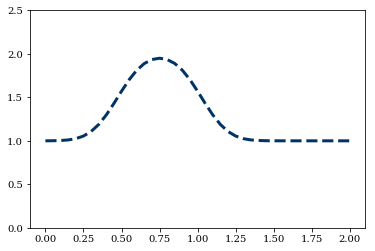

In [3]:
for n in range(nt):  
    cn = c.copy() 
    c[1:-1] = cn[1:-1] + k*dt/dx**2*(cn[2:] -2*cn[1:-1] +cn[0:-2]) 
        
pyplot.plot(x, c, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

### Animação do gráfico
<div class="alert alert-warning">
<b>NOTA: </b> Temos que instalar o video encoder video encoder/decoder chamando `ffmpeg`.


Se você utiliza Linux or OSX, você pode instalar o `ffmpeg` via `conda`:

```console
conda install -c conda-forge ffmpeg
```

Se você utiliza o Windows, sigua as instruções de instalação do link:
http://adaptivesamples.com/how-to-install-ffmpeg-on-windows/
</div>

In [4]:
from matplotlib import animation
from IPython.display import HTML

Agora precisamos reiniciar nossas condições iniciais!!

In [5]:
nt = 50

c = numpy.ones(nx)      
c[numpy.intersect1d(lbound, ubound)] = 2  

cn = numpy.ones(nx) 

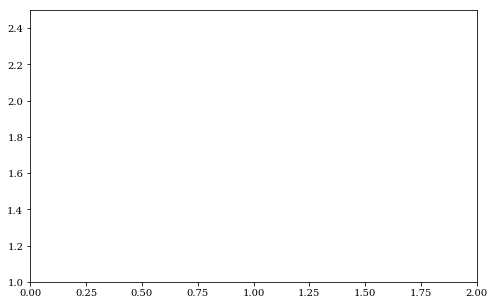

In [6]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,2), ylim=(1,2.5))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0];

In [7]:
def diffusion(i):
    line.set_data(x,c)
    
    cn = c.copy() 
    c[1:-1] = cn[1:-1] + k*dt/dx**2*(cn[2:] -2*cn[1:-1] + cn[0:-2]) 

Inicializamos a animação utilizando `animation.FuncAnimation()` e salvando a animação com o nome de `anim`. Os seguintes argumentos da função são:

*  `fig`: nome da figura
*  `diffusion`: nome da função que possui o solver
*  `frames`: número de frames para salvar a figura (igual à variável `nt`)
*  `interval`: número de milissegundos para cada quadro aparecer

In [8]:
anim = animation.FuncAnimation(fig, diffusion, frames=nt, interval=100)

Ok! Hora de exibir a animação. Usamos o método de exibição `HTML` que importamos acima e o método `to_html5_video` para torná-lo compatível com a web.

In [9]:
HTML(anim.to_html5_video())

### Vamos ver um exemplo clássico de equação parabólica no próximo _notebook_!!

In [10]:
from IPython.core.display import HTML
css_file = '../styles/custom.css'
HTML(open(css_file, "r").read())